In [1]:
# Import Project
import sys
sys.path.append('.')
from amongus.agent import *
from amongus.game import *
from amongus.randomModel import *
from amongus.world import *

# External Packages
import numpy as np
import torch

In [2]:
map_size = 10
num_tasks = 10
num_agents = 20
max_steps = 1000
message_length = 5

params = {
    'vote_period': 5,
    'impostor_frac': 0.2,
    'message_length': message_length
}

In [3]:
game = Game(map_size, num_tasks, num_agents, max_steps, params=params)

In [16]:
def sample():
    game = Game(map_size, num_tasks, num_agents, max_steps, params=params)
    model = Model(num_agents, message_length)
    o_t = game.get_observations()
    a_t = game.get_actions(model, o_t)
    game.reset()
    ongoing = True

    count = 0
    while ongoing:
        o_t, r_t, ongoing = game.step(a_t)
        a_t = game.get_actions(model, o_t)
        count += 1

    return count, game.win_condition

In [33]:
from time import time
from tqdm import tqdm

start = time()
samples = []
for _ in tqdm(range(100)):
    samples.append(sample())
elapsed = time() - start

print('Average Game Time: {}'.format(elapsed/100.0))

100%|██████████| 100/100 [00:10<00:00,  9.48it/s]

Average Game Time: 0.10556535482406616


In [8]:
game

NameError: name 'game' is not defined

## New Results

In [44]:
counts, outcomes = zip(*samples)

freq = {e: outcomes.count(e) for e in set(outcomes)}
print(freq)

{'Impostors Erradicated': 41, 'Impostor Majority': 59}


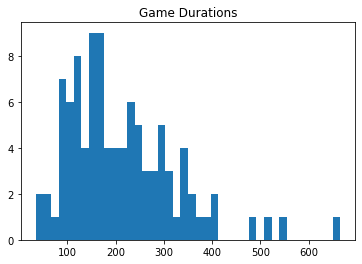

In [45]:
from matplotlib import pyplot as plt

plt.hist(counts, bins=40)
plt.title('Game Durations')
plt.show()

## Old Results ( without task termination )

In [19]:
counts, outcomes = zip(*samples)

freq = {e: outcomes.count(e) for e in set(outcomes)}
print(freq)

{'Impostors Erradicated': 564, 'Uncompleted Tasks': 5, 'Impostor Majority': 431}


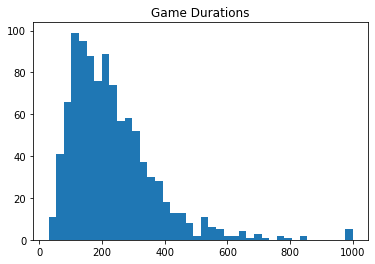

In [25]:
from matplotlib import pyplot as plt

plt.hist(counts, bins=40)
plt.title('Game Durations')
plt.show()

In [22]:
nums = sorted(list(set(counts)))
counter = [counts.count(n) for n in nums]

<BarContainer object of 129 artists>

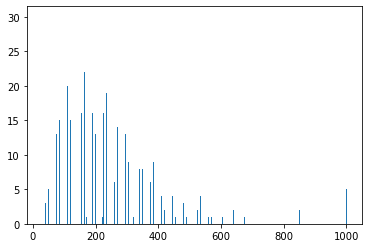

In [23]:
plt.bar(nums, counter)

In [6]:
num_agents = 10
impostor_frac = 0.2

rng = np.random.default_rng()
rng.choice(num_agents, size=max(int(num_agents * impostor_frac), 1), replace=False)

array([8, 5])

In [8]:
samples = np.array(samples)
samples.mean()

24.058